# Stock Prediction with ARIMA model

Goal of this project:
1. Understand the characteristics of time series data and the concept of stationary time series.
2. Understand the concepts of `AR`, `MA`, and `diffrencing` of the ARIMA model and apply it to simple stock time series data.
3. Apply ARIMA to actual stock data to check the prediction accuracy.

## Dataset
I downloaded 3 stocks' (`Samsung Electronics (005930.KS)`, `Skillz (SKLZ)`, and `SPDR S&P 500 ETF Trust (SPY)`)  historical stock datasets from Yahoo Financial.   
- `Samsung Electronics (005930.KS)` : https://finance.yahoo.com/quote/005930.KS/history?p=005930.KS
- `Skillz (SKLZ)`: https://finance.yahoo.com/quote/SKLZ/history?p=SKLZ
- `SPDR S&P 500 ETF Trust (SPY)`: https://finance.yahoo.com/quote/SPY/history?p=SPY

## Table of Contents
0. Time-Series Data Prediction and ARIMA model
1. Load the dataset
2. Data Preprocessing
3. Time Series Stability Analysis
4. Create Training and Test Dataset
5. Find Titration ARIMA Parameters
6. ARIMA model training and testing
7. Samsung Electronics (KRX: 005930) Stock Prediction
8. Skillz (SKLZ) Stock Prediction 
9. SPDR S&P 500 ETF Trust (SPY) Stock Prediction

# 0. Time-Series Data Prediction and ARIMA model

## How to Predict the Future?
A `time series` means a sequence of data that occurs in chronological order. It can be expressed as a formula as follows.

$Y = {Y_t : t \in T}$, where $T$ is the index set

Let's say you have several years of time-series data of daily price movements up to today for a particular stock. So, based on this data, can we predict what the price of this stock will be tomorrow, or even go up or down?    

It is impossible to predict the future. If you want to predict future data, you need at least two assumptions:
1. There is a certain pattern is found in past data.
2. The pattern of the past will be repeated in the future.

We can say it like this:  
> It is possible to predict the future only if we have a `stationary` data.

Here, `Stationary` means that the statistical properties of the time series data do not change. It means that a certain process exists regardless of the change in time that produces time series data. If a constant pattern of annual climate change is maintained despite daily weather changes that seem very irregular, tomorrow's temperature can be predicted within a certain margin of error due to the stationarity created by the constant climate change process on the planet.

One important thing to remember is that the time series data analysis does not guarantee **perfect** future prediction.

This is because the **stationarity**, which is the premise of time series data analysis, may be compromised by some **unpredictable external variables** (i.e., Covid situation).



## How can we measure 'Stationary' with Statistics (Covariance and Correlation)
Covariance and correlation are similar, they are the indicators of how correlated the distributions of two random variables X and Y are.    
So, **how are the two concepts different**?   
   
Since **covariance** is affected by the unit size of the X and Y variables, the value itself **does not directly represent the correlation between the two variables**.
   
Therefore, **correlation** is corrected so that the correlation between two variables is always expressed as a value between -1 and 1 by **normalizing the covariance** (by dividing it by the product of the standard deviation of the two variables).
   
Also, if two random variables X and Y are **independent**, both covariance and correlation are **0**.



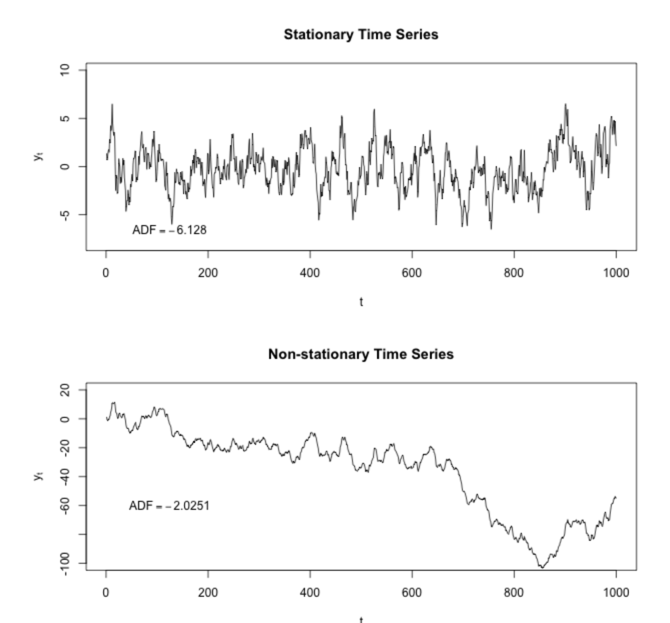




## Autocovariance and Autocorrelation Function

### Autocovariance Function:   
$Y_x = \gamma(h) = Cov(X_t, X_{t+h}) = E[(Y_t - \mu)(Y_{t-k} - \mu)]$

It is expressed as gamma $\gamma$, and X is the target variable. Auto means self. Then in the covariance, you say that you covariate yourself, then it will be the variance.    
Then why it is covariance?   

It is by itself, but it is not a complete self, but **a covariance with itself shifted by an interval of h**. So, if $X_t$ is itself, finding the covariance with $X_{t+h}$ is an autocovariance, and this function is called an **autocovariance function**. However, here it is assumed that the time t has the same properties, so it can be expressed as a function of only h.    
Therefore, the self-covariance is expressed as $\gamma (h)$.

### Autocorrelation Function:    
$\rho_k = Corr(Y_t, Y_{t-k}) = \gamma_k / \gamma_0 = ACF	$

Autocorrelation is just a normalization of autocovariance. So, autocorrelation can be expressed with autocovariance.    
By definition, it represents a rho $\rho$, and an X here also indicates which variable you are interested in.  

Looking at the formula, we divide the autocovariance by the standard deviation for each. The standard deviation is now expressed by rooting the variance, because the variance is expressed in the form of autocovariance.    

So, then the variance over $X_t$ can be the covariance between $X_t$ and $X_t$ itself. Then, it can be expressed as autocovariance, and lag can be set to 0. And if the same is applied to $X_{t+h}$, it can be said that it is the covariance between $X_{t+h}$ and $X_{t+h}$.

## Requirements for the 'Stationary' Time-Series data
So, to predict the **stationary Time Series**, let's say we want to predict what $X_{t+1}$ will be with $X_{t-4}, X_{t-3}, X_{t-2}, X_{t-1}, X_t$ for the previous 5 items.   
   
The important thing for this prediction to be meaningful is that it must be true regardless of t.   
   
If the model accurately predicts X(2011) with data at t=2010, the model should be able to accurately predict X(2021) even if t=2020 is substituted for this model.   
   
This requires that the **mean and variance** of $X_{t-4}, X_{t-3}, X_{t-2}, X_{t-1}, X_t$, irrespective of t, must be within a range.   
   
Also, $X_{t-h} and X_t$ must have a constant correlation that differs only for h independent of t.   
    
Otherwise our time series forecasts will be t-dependent, in-the-moment forecasts. This undermines the premise of time series forecasting that patterns from the past will repeat in the future.   

## Augmented Dickey-Fuller Test (ADF Test)
We can use a statistical method for testing the stability (stationary) of time series data is available called the **Augmented Dickey-Fuller Test (ADF Test)**. The following is the list of steps.

1. After establishing the null hypothesis that the given time series data is not stable
2. If this null hypothesis is rejected through the statistical hypothesis testing process
3. Adopt the alternative hypothesis that this time series data is stable.

I will show you how we can do this below with the code with `statsmodels` package and `addfuller`.

## p-value (significant probability)
The definition of p-value is the probability that an observation is more extreme than the current observation on the probability distribution when the null hypothesis is assumed, and also the probability that the assumption of the null hypothesis is wrong.    

If this value is very low, less than 0.05, it becomes a basis for rejecting the null hypothesis and adopting the alternative hypothesis with the probability of error as large as the p-value.


## Ways to make the data 'Stationary'
1. Try to process/transform existing time series data to have more stable characteristics through qualitative analysis
- Apply log transformation
- Remove Moving Average - Offsetting Trend
- Apply Differentiation - Offsetting Seasonality
2. Apply **Time series decomposition**
- The residual obtained through decomposing shows an overwhelmingly low p-value.



## ARIMA model

If **Trend** and **Seasonality** are well separated, **Residual** becomes a predictable and stable time series data.

`Autoregressive Integrated Moving Average (ARIMA)` allows you to use this principle to automatically create time-series data forecasting models.

`ARIMA` can be said to be `AR (Autoregressive)` + `I (Integrated)` + `MA (Moving Average)`.    
Think of $Y = {Y_t: t \in T}$. To predict $Y_t$, we can consider the following models:

### 1. AR (Autoregressive)
- It is a way to predict future values by regression on past values.
- It assumes that $, Y_t$ converges to a weighted sum of the past p number of data $Y_{t-p}, ... , Y_{t-3}, Y_{t-2}, Y_{t-1}$.
- `AR` can be viewed as modeling the `residual` part of a time series.
- It is an `autoregressive` model that converges to a weighted sum of $Y_{t-p}, ... , Y_{t-3}, Y_{t-2}, Y_{t-1}$ with weights less than 1 and a stable time series are statistically equivalent.
- Predicting that stock prices will always maintain a constant equilibrium level is the perspective of modeling stock time series with `AR`.

### 2. MA (Moving Average)
- `MA` is a model that assumes that $Y_t$ converges to the weighted sum of the previous q prediction error values 
- `MA` can be seen as modeling the part corresponding to the `trend` of the time series.
- If the prediction error $e_{t-1}$ is greater than 0, it means that the observations are higher than the model predictions, so the next $Y_t$ prediction will raise the prediction.
- The prediction that stock prices will continue the recent increase/decrease pattern can be viewed as the view of modeling with `MA`.

$Y_t = \mu + e_t + \theta_1e_{t-1} + \theta_2e_{t-2} + ... + \theta_qe_{t-q}$ .


### 3. I (Integration)
- `I` is the model where $Y_t$ is the **integration sum** of the previous data and the d-th difference.
- `I` can be seen as modeling the part corresponding to the `seasonality` of the time series.
- For example, if $d = 1$, then consider $Y_t = Y_{t-1} + \nabla Y_{t-1}$

So while considering the above, for the stock prediction, we can think of 2 things:
1. `AR` kinds of expectations of 'Is the stock going to rise and balance today?
2.  `MA` kinds of concern, such as 'since it fell yesterday, will it continue to fall in a trend?'
3. `ARIMA` demonstrates the ability to find an appropriate level between the two models.


### Parameters p, q, d of the ARIMA model
In order to use `ARIMA` effectively, it is necessary to set the parameters of `ARIMA` well. In other words, the correct prediction formula can be obtained only when the key numbers are well set.

`ARIMA` has three parameters:

- p : Parallax of autoregressive model (AR)
- q: lag of moving average model (MA)
- d: number of accumulated differences (I)


`p` and `q` usually take values such that `p + q < 2, p * q = 0`, meaning either `p` or `q` is zero. The reason for doing this is that a lot of time series data tends to be either `AR` or `MA`.

So how are the parameters `p`, `q`, and `d` determined? It is very difficult to explain from here.

There are many statistical attempts to select the appropriate parameters `p`, `d`, and `q` of `ARIMA`, but if we only talk about representative ones, we can say `ACF (Autocorrelation Function)` and `PACF (Partial Autocorrelation Function)`. This `AutoCorrelation` is like the **autocorrelation coefficient**, one of the concepts we covered in the very first step.

### ACF
- A function that measures the relationship between observations according to lag.
- It Describes how the present value of a given time series correlates with the past value of $Y_{t-p}, ... , Y_{t-3}, Y_{t-2}, Y_{t-1}$.
- In the ACF plot, the X-axis represents the correlation coefficient, and the y-axis represents the number of lags.


### PACF
- A function that **excludes the influence of other observations** and measures the relationship between observations of two lags.
- $Y_{t-1}, Y_{t-2}, ..., Y_{t-k+1}$ measure of how related two particular observations, $Y_{t-k}$ and $Y_t$, are related, excluding the influence of observation A with all lags other than k.

# 1. Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Create Time Series
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/005930.KS.csv' 
# Set Date column as an index_column 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-07,56100.0,57300.0,55800.0,56500.0,54293.320313,18685880
2020-09-08,57400.0,58700.0,57200.0,58700.0,56407.398438,31517520
2020-09-09,58200.0,59300.0,57800.0,58400.0,56119.109375,30597399
2020-09-10,59900.0,60000.0,59100.0,59200.0,56887.863281,29923293
2020-09-11,59300.0,59400.0,58200.0,59000.0,56695.679688,16017098


In [2]:
ts = df['Close']
ts.head()

Date
2020-09-07    56500.0
2020-09-08    58700.0
2020-09-09    58400.0
2020-09-10    59200.0
2020-09-11    59000.0
Name: Close, dtype: float64

Visualize the stock price

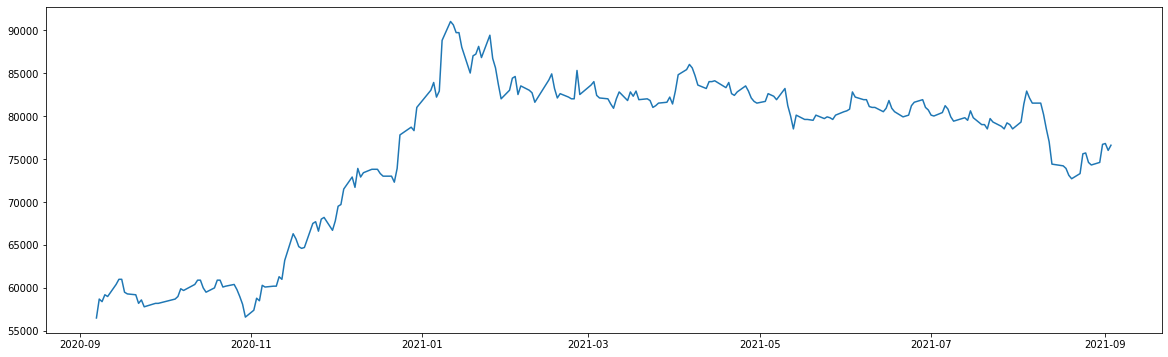

In [19]:
plt.rcParams['figure.figsize'] = 20, 
plt.plot(ts)

# 2. Data Preprocessing

In [20]:
# Deal with null data
ts=ts.interpolate(method='time')
ts[ts.isna()]  # missing values in the Time Series is output as a Series.

Series([], Name: Close, dtype: float64)

In [21]:
# log transformation
ts_log = np.log(ts)

# 3. Time Series Stability Analysis

- Qualitative graph analysis
- Quantitative Augmented Dicky-Fuller Test
- Time Series Decomposition
- Residual stability check

In [22]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # moving average time series
    rolstd = timeseries.rolling(window=window).std()    # Moving standard deviation time series

     # Visualize the original time series, moving average, and moving standard deviation as a plot.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

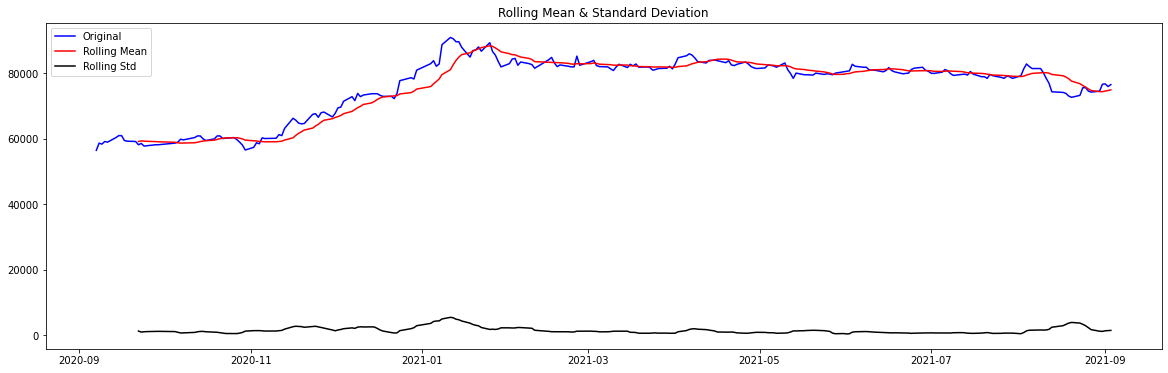

In [23]:
plot_rolling_statistics(ts, window=12)

It looks like the average analysis pattern changes over time, but not constant.

## Check Stationary

In [24]:
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_test(timeseries):
    # addfuller method provided by the statsmodels package.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # Organize and output the results returned by the adder method
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [29]:
# Quantitative Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -2.306538
p-value                          0.169868
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


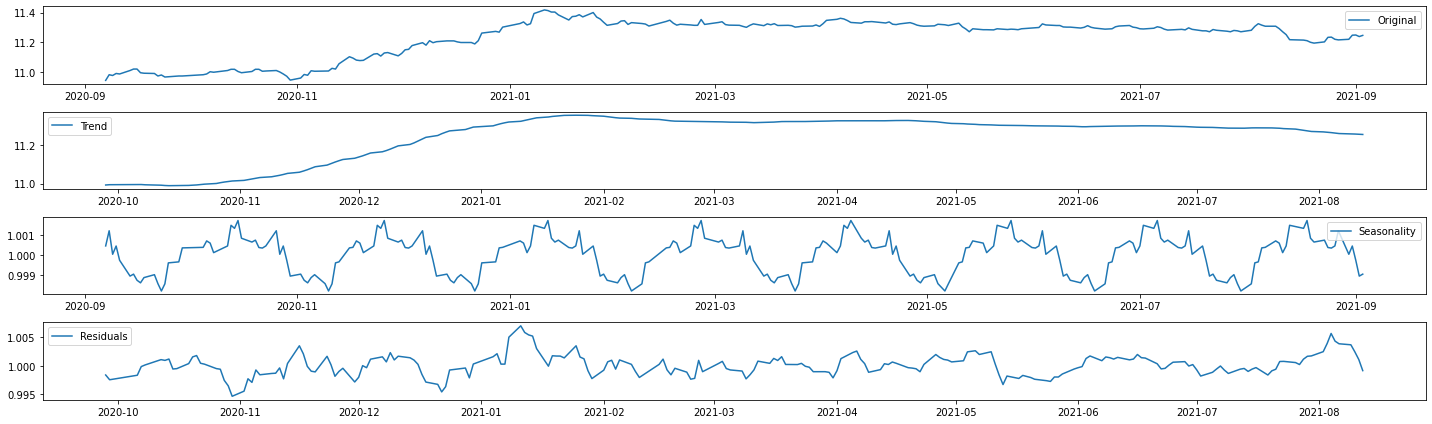

In [26]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

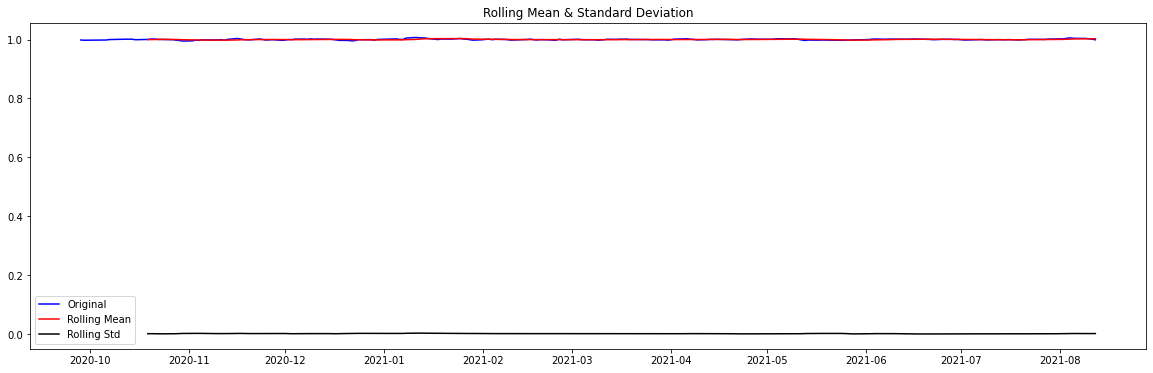

In [28]:
plot_rolling_statistics(residual)


In [30]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.764141e+00
p-value                        5.583310e-07
#Lags Used                     9.000000e+00
Number of Observations Used    2.070000e+02
Critical Value (1%)           -3.462342e+00
Critical Value (5%)           -2.875606e+00
Critical Value (10%)          -2.574267e+00
dtype: float64


We can see its a little improved to compare with the previous one.

# 4. Create training and test datasets

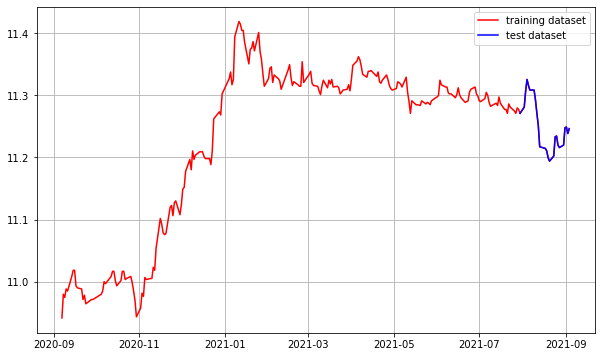

In [8]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # If train_data is applied, the graph looks broken, so ts_log is selected for natural rendering.
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# 5. Find Titration ARIMA Parameters
- Draw ACF, PACF -> Find p, q
- Check difference stability -> find d

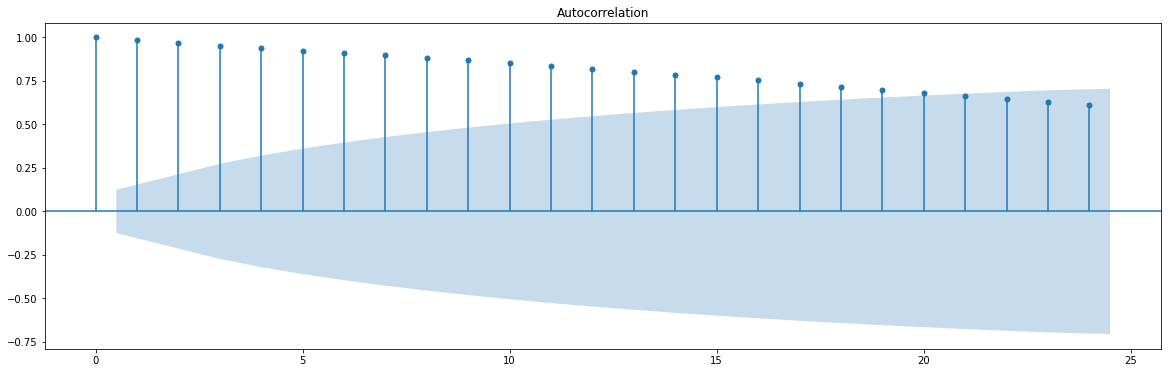

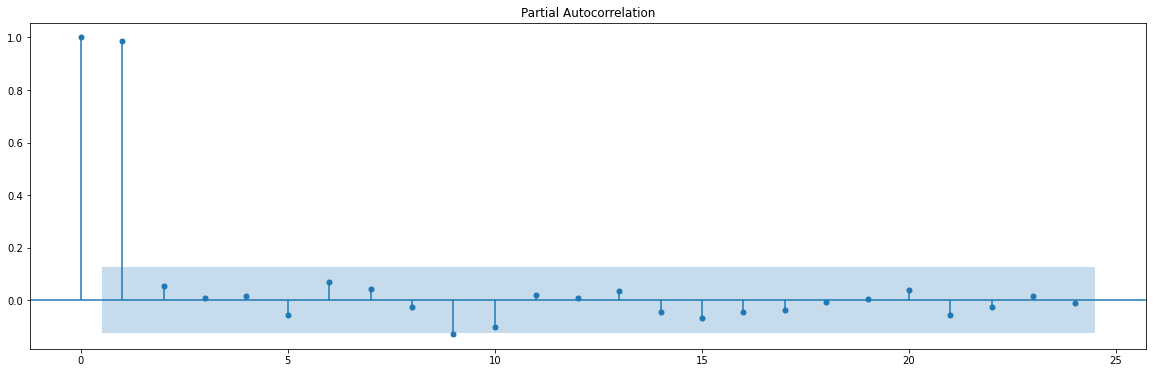

In [31]:
# Visualize ACF, PACF -> Get p,q 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 
plt.show()

Based on the above graph, we can see that `p=1` would be appropriate. when p is larger then 1, PACF is approaching to 0, which means that the data correlationality is decreasing.

Results of Dickey-Fuller Test:
Test Statistic                -1.136234e+01
p-value                        9.406420e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.076408e+01
p-value                        2.478124e-19
#Lags Used                     7.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.136234e+01
p-value                        9.406420e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+

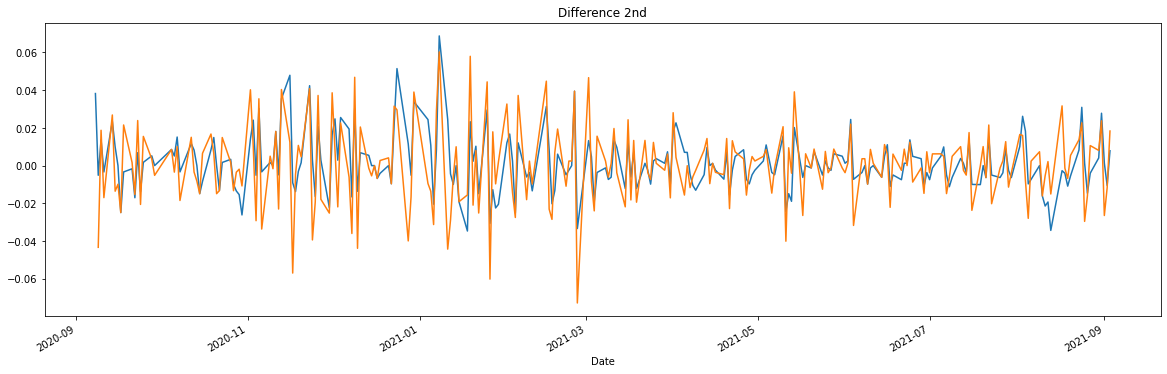

In [32]:
# Find the first difference
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# Find the first difference if needed
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

augmented_dickey_fuller_test(diff_1)

# 6. ARIMA model training and testing
- Build and train ARIMA models
- Model testing and plotting
- Final Predictive Model Accuracy Measurement (MAPE)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 616.493
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sun, 05 Sep 2021   AIC                          -1226.987
Time:                        07:32:22   BIC                          -1216.792
Sample:                             1   HQIC                         -1222.870
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0015      0.001      1.476      0.140      -0.000       0.004
ar.L1.D.Close     0.0300      0.068      0.442      0.659      -0.103       0.163
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

# 7. Samsung Electronics (KRX: 005930) Stock Prediction

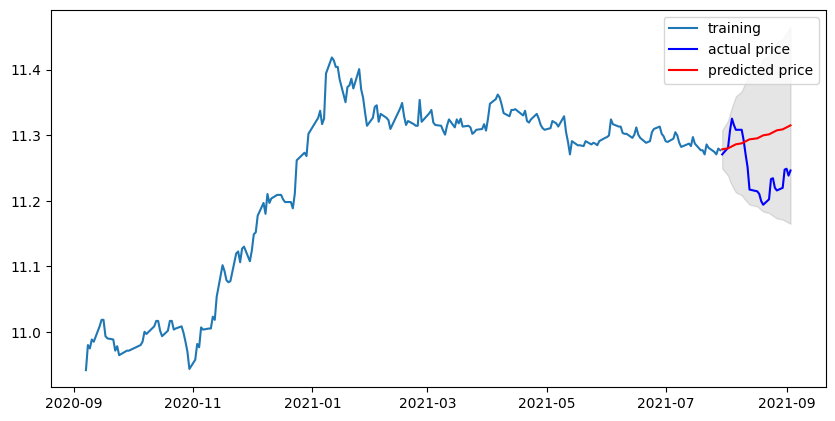

In [34]:
# Forecast result in fc
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # prediction result
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # lower bound of the prediction result
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # upper bound of the prediction result

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  26416266.709144436
MAE:  4496.305426539557
RMSE:  5139.675739688685
MAPE: 5.96%


# 8. Skillz (SKLZ) Stock Prediction 

In [36]:
filepath2 = os.getenv('HOME')+'/aiffel/stock_prediction/SKLZ.csv' 
df2 = pd.read_csv(filepath2, index_col='Date', parse_dates=True)
ts2 = df2['Close']
print(ts2.head())

Date
2020-09-08    12.30
2020-09-09    12.88
2020-09-10    12.36
2020-09-11    12.10
2020-09-14    12.22
Name: Close, dtype: float64


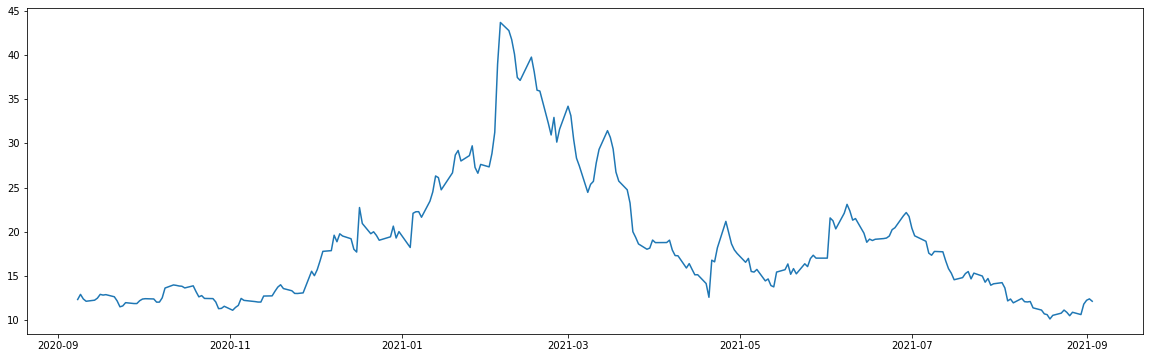

In [38]:
plt.rcParams['figure.figsize']=20, 6
plt.plot(ts2)

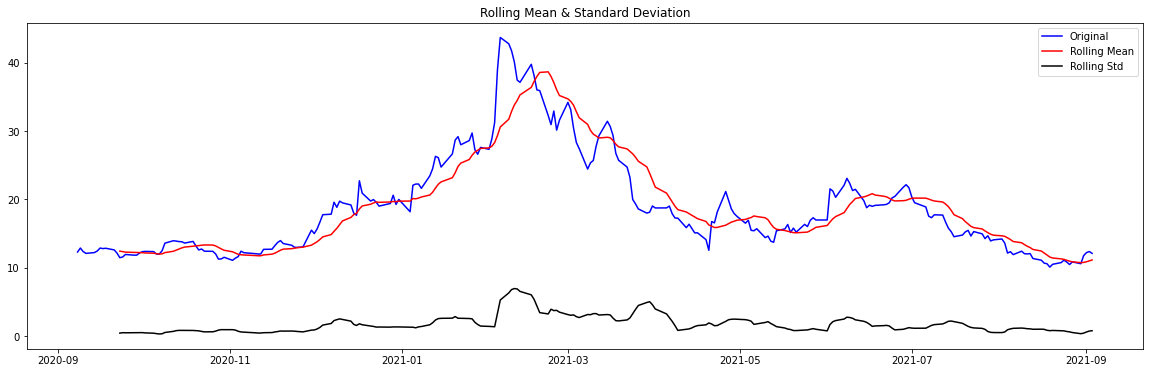

In [39]:
plot_rolling_statistics(ts2,window=12)

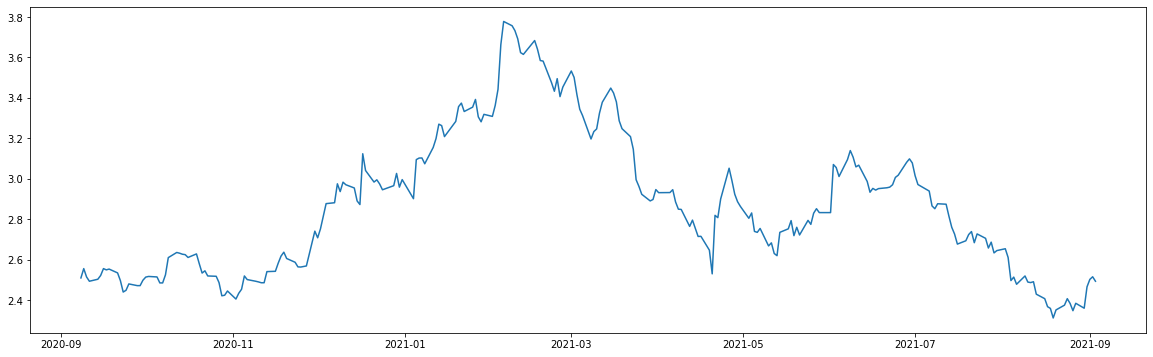

In [40]:
ts_log2 = np.log(ts2)
plt.plot(ts_log2)

In [41]:
augmented_dickey_fuller_test(ts_log2)

Results of Dickey-Fuller Test:
Test Statistic                  -1.344547
p-value                          0.608554
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


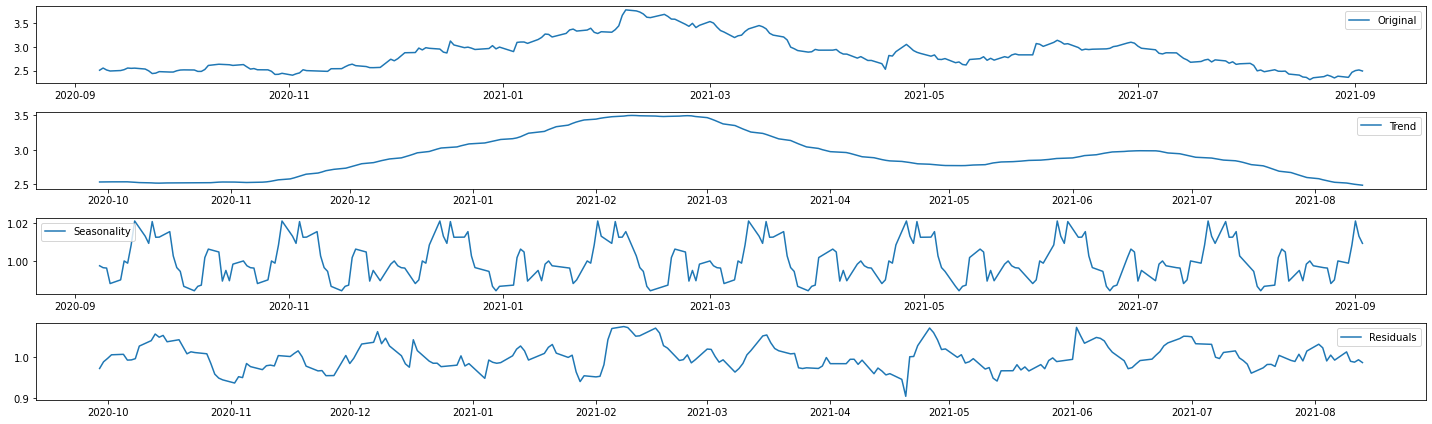

In [42]:
# Time Series Decomposition
decomposition2 = seasonal_decompose(ts_log2, model='multiplicative',period=30)

trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

plt.subplot(411)
plt.plot(ts_log2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
# Remove trend and seasonality, and the rest
# Trend+Seasonality+Residual = Original
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

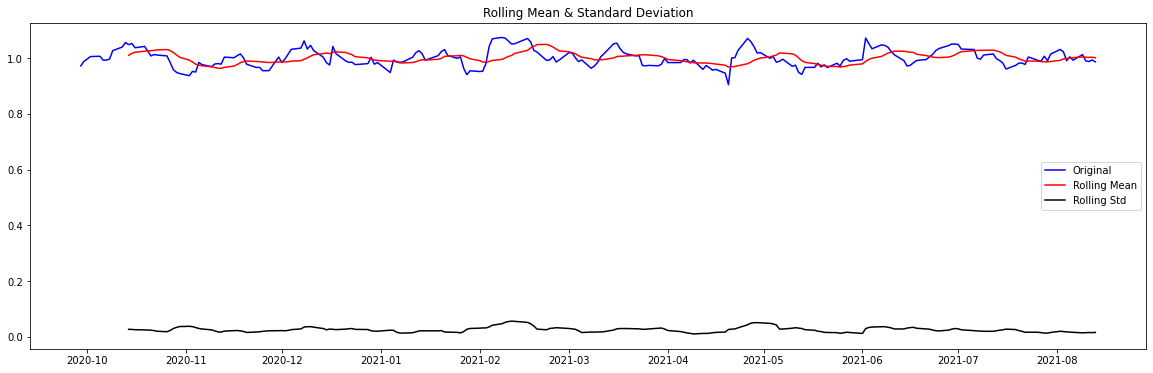

In [43]:
plot_rolling_statistics(residual2)


In [44]:
residual2.dropna(inplace=True)
augmented_dickey_fuller_test(residual2)

Results of Dickey-Fuller Test:
Test Statistic                -5.931478e+00
p-value                        2.374945e-07
#Lags Used                     4.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


We can see the p-value has decreased.   
Let's separate training and testing dataset.

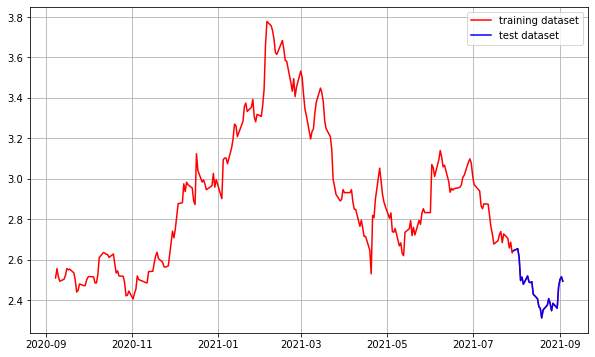

In [45]:
train_data2, test_data2 = ts_log2[:int(len(ts_log2)*0.9)], ts_log2[int(len(ts_log2)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log2, c='r', label='training dataset')  
plt.plot(test_data2, c='b', label='test dataset')
plt.legend()

In [46]:
# Build Model
model2 = ARIMA(train_data2, order=(1, 1, 0))  
fitted_m2 = model2.fit(disp=-1)  
print(fitted_m2.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 308.743
Method:                       css-mle   S.D. of innovations              0.061
Date:                Sun, 05 Sep 2021   AIC                           -611.486
Time:                        07:44:56   BIC                           -601.251
Sample:                             1   HQIC                          -607.354
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.004      0.130      0.896      -0.008       0.009
ar.L1.D.Close     0.0371      0.067      0.555      0.579      -0.094       0.168
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

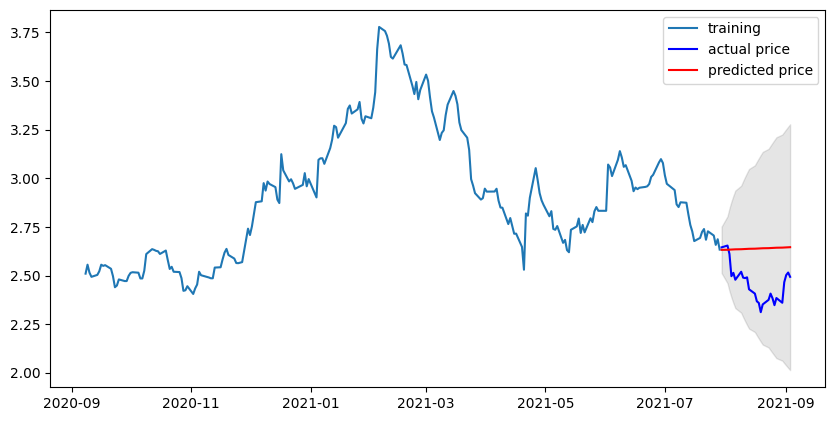

In [47]:
fc2, se2, conf2 = fitted_m2.forecast(len(test_data2), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series2 = pd.Series(fc2, index=test_data2.index) # prediction result   
lower_series2 = pd.Series(conf2[:, 0], index=test_data2.index)  # lower bound of the prediction result
upper_series2 = pd.Series(conf2[:, 1], index=test_data2.index)  # upper bound of the prediction result

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, c='b', label='actual price')
plt.plot(fc_series2, c='r',label='predicted price')
plt.fill_between(lower_series2.index, lower_series2, upper_series2, color='k', alpha=.10)
plt.legend()
plt.show()

In [48]:
mse2 = mean_squared_error(np.exp(test_data2), np.exp(fc2))
print('MSE: ', mse2)

mae2 = mean_absolute_error(np.exp(test_data2), np.exp(fc2))
print('MAE: ', mae2)

rmse2 = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(fc2)))
print('RMSE: ', rmse2)

mape2 = np.mean(np.abs(np.exp(fc2) - np.exp(test_data2))/np.abs(np.exp(test_data2)))
print('MAPE: {:.2f}%'.format(mape2*100))

MSE:  6.508621381350694
MAE:  2.3323088281502633
RMSE:  2.551199988505545
MAPE: 20.88%


# 9. SPDR S&P 500 ETF Trust (SPY) Stock Prediction

In [49]:
filepath3 = os.getenv('HOME')+'/aiffel/stock_prediction/SPY.csv' 
df3 = pd.read_csv(filepath3, index_col='Date', parse_dates=True)
ts3 = df3['Close']
print(ts3.head())

Date
2020-09-08    333.209991
2020-09-09    339.790009
2020-09-10    333.890015
2020-09-11    334.059998
2020-09-14    338.459991
Name: Close, dtype: float64


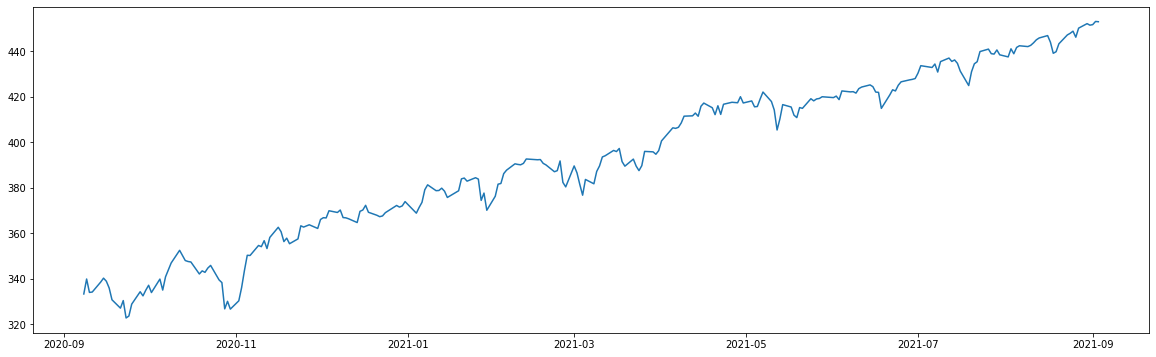

In [50]:
plt.rcParams['figure.figsize']=20, 6
plt.plot(ts3)

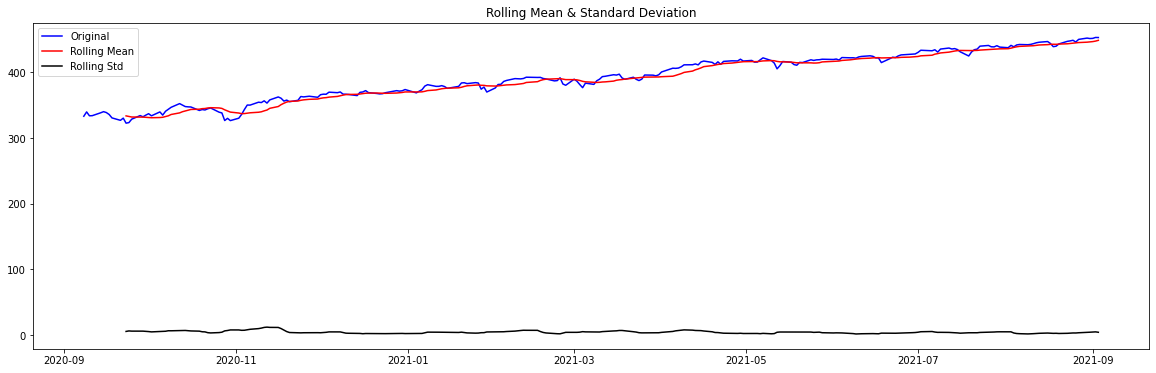

In [51]:
plot_rolling_statistics(ts3,window=12)

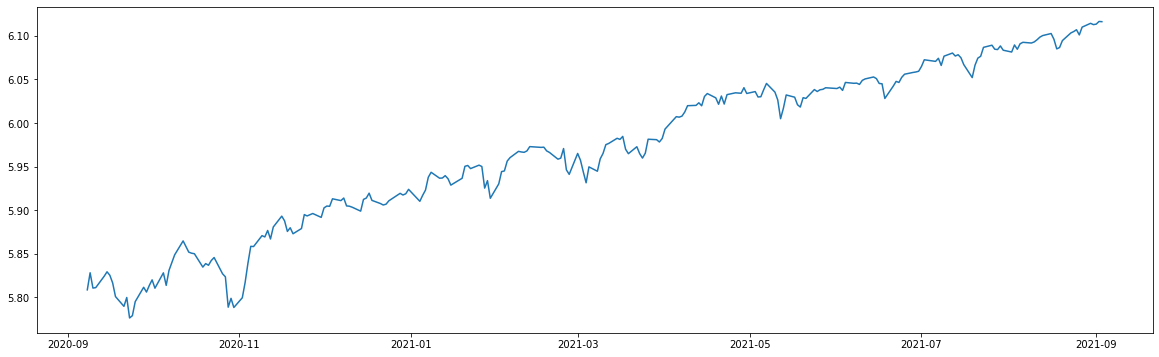

In [52]:
ts_log3 = np.log(ts3)
plt.plot(ts_log3)

In [53]:
augmented_dickey_fuller_test(ts_log3)

Results of Dickey-Fuller Test:
Test Statistic                  -1.262258
p-value                          0.646258
#Lags Used                      13.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


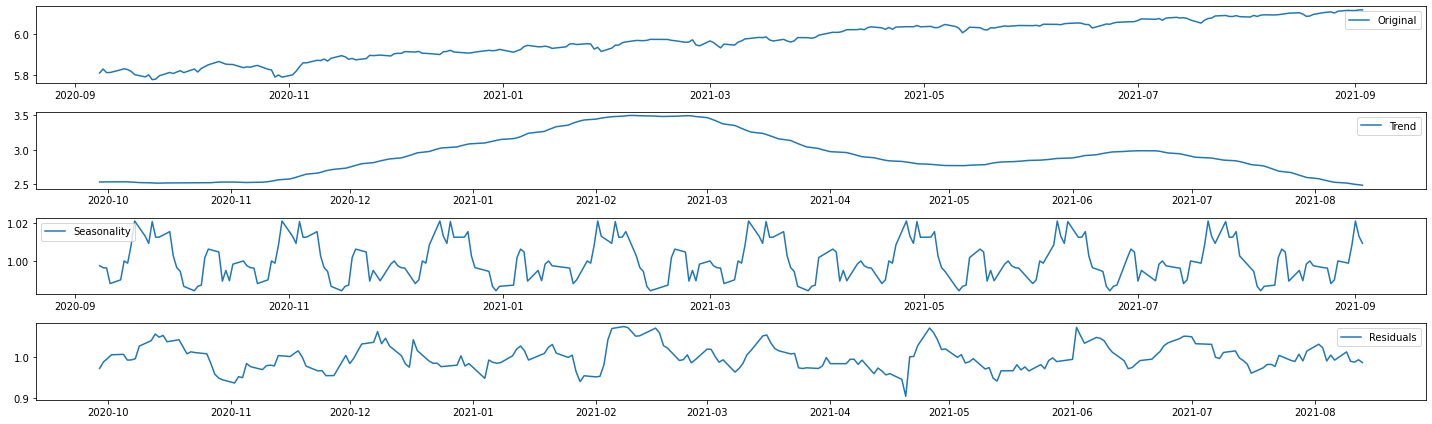

In [54]:
# Time Series Decomposition
decomposition3 = seasonal_decompose(ts_log3, model='multiplicative',period=30)

trend3 = decomposition2.trend
seasonal3 = decomposition2.seasonal
residual3 = decomposition2.resid

plt.subplot(411)
plt.plot(ts_log3, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend3, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal3,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
# trend와 seasonality를 제거하고 난 나머지
# Trend+Seasonality+Residual = Original
plt.plot(residual3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

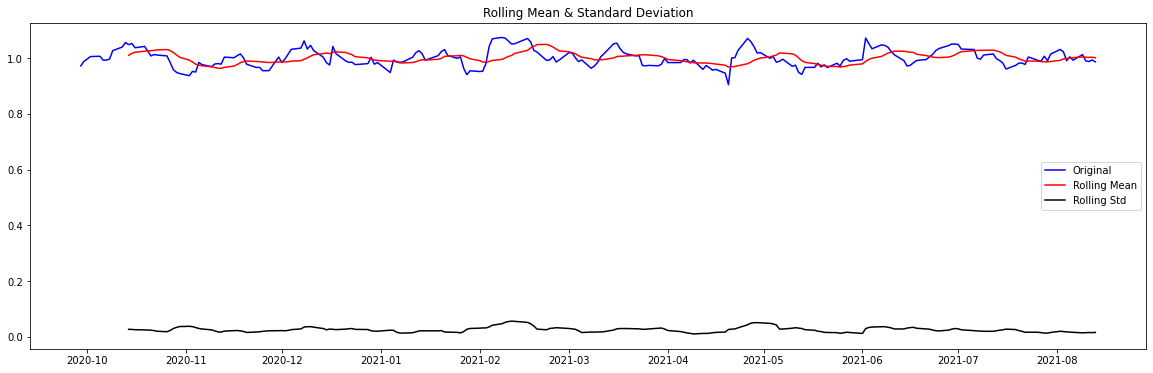

In [55]:
plot_rolling_statistics(residual3)


In [56]:
residual3.dropna(inplace=True)
augmented_dickey_fuller_test(residual3)

Results of Dickey-Fuller Test:
Test Statistic                -5.931478e+00
p-value                        2.374945e-07
#Lags Used                     4.000000e+00
Number of Observations Used    2.160000e+02
Critical Value (1%)           -3.460992e+00
Critical Value (5%)           -2.875016e+00
Critical Value (10%)          -2.573952e+00
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -6.290918e+00
p-value                        3.601140e-08
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


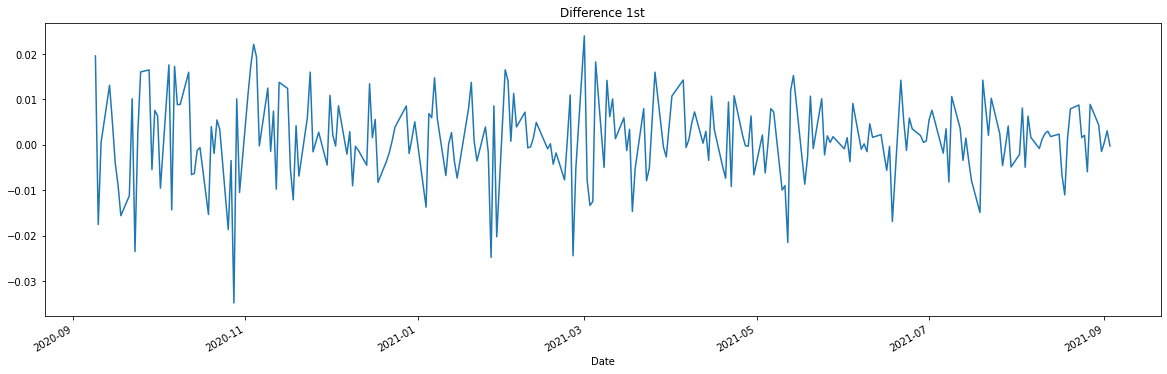

In [57]:
diff_1_3 = ts_log3.diff(periods=1).iloc[1:]
diff_1_3.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_3)

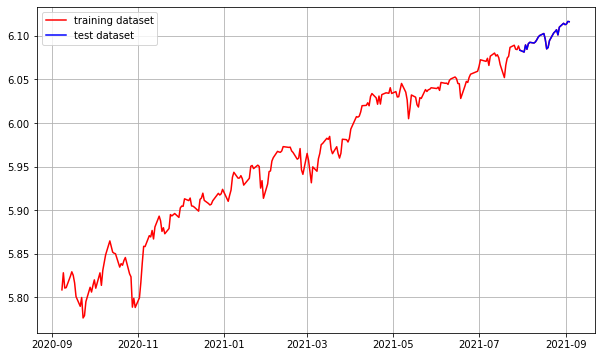

In [58]:
train_data3, test_data3 = ts_log3[:int(len(ts_log3)*0.9)], ts_log3[int(len(ts_log3)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log3, c='r', label='training dataset')  
plt.plot(test_data3, c='b', label='test dataset')
plt.legend()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 731.369
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sun, 05 Sep 2021   AIC                          -1456.737
Time:                        07:51:13   BIC                          -1446.502
Sample:                             1   HQIC                         -1452.606
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0012      0.001      2.153      0.031       0.000       0.002
ar.L1.D.Close    -0.0716      0.067     -1.067      0.286      -0.203       0.060
                                    Root

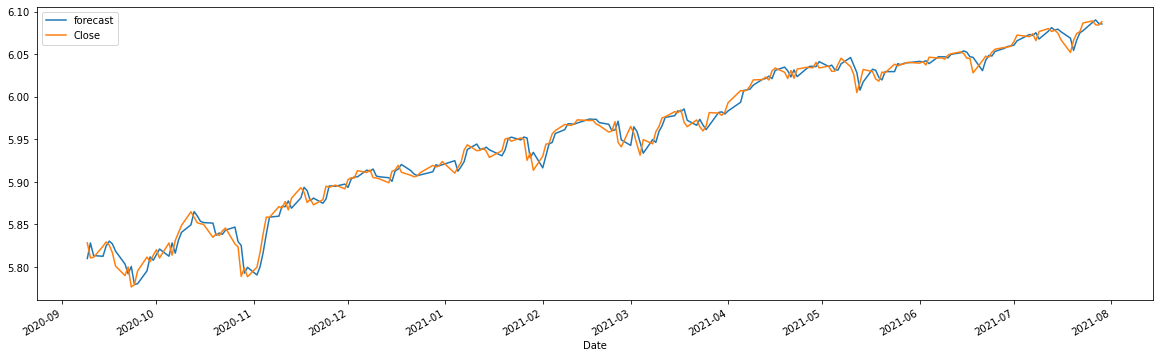

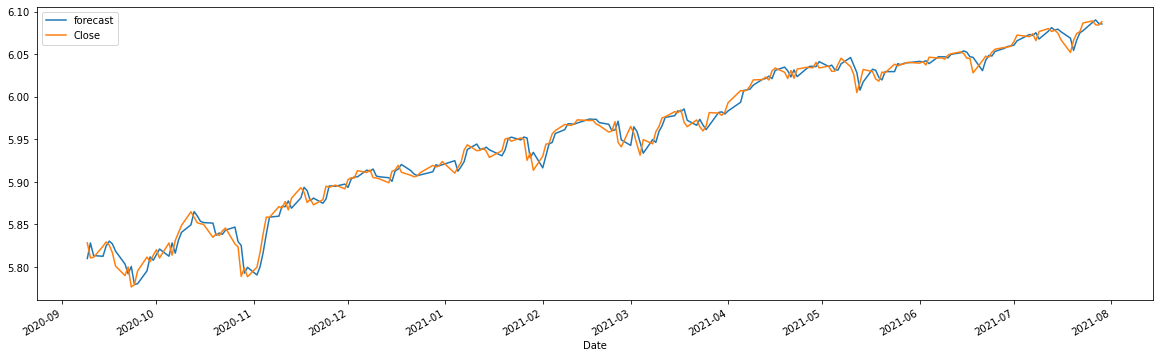

In [59]:
# Build Model
model3 = ARIMA(train_data3, order=(1, 1, 0))  
fitted_m3 = model3.fit(disp=-1)  
print(fitted_m3.summary())

fitted_m3.plot_predict()


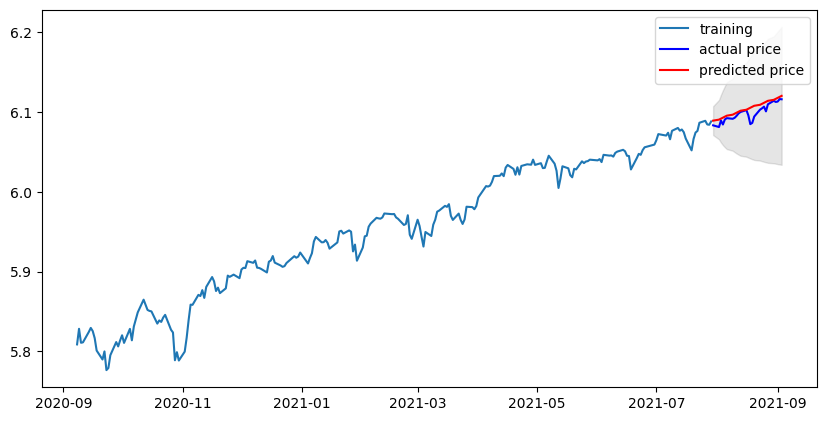

In [60]:
fc3, se3, conf3 = fitted_m3.forecast(len(test_data3), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series3 = pd.Series(fc3, index=test_data3.index)   # prediction result
lower_series3 = pd.Series(conf3[:, 0], index=test_data3.index)  # lower bound of the prediction result
upper_series3 = pd.Series(conf3[:, 1], index=test_data3.index)  # upper bound of the prediction result

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, c='b', label='actual price')
plt.plot(fc_series3, c='r',label='predicted price')
plt.fill_between(lower_series3.index, lower_series3, upper_series3, color='k', alpha=.10)
plt.legend()
plt.show()

In [61]:
mse3 = mean_squared_error(np.exp(test_data3), np.exp(fc3))
print('MSE: ', mse3)

mae3 = mean_absolute_error(np.exp(test_data3), np.exp(fc3))
print('MAE: ', mae3)

rmse3 = math.sqrt(mean_squared_error(np.exp(test_data3), np.exp(fc3)))
print('RMSE: ', rmse3)

mape3 = np.mean(np.abs(np.exp(fc3) - np.exp(test_data3))/np.abs(np.exp(test_data3)))
print('MAPE: {:.2f}%'.format(mape3*100))

MSE:  12.922326109719176
MAE:  2.797541807678208
RMSE:  3.594763707077167
MAPE: 0.63%


# Conclusion

## Results
- I think this stock time series data was compromised by some unpredictable external variables (i.e., Covid situation which was started from 2020 and still in progress).
- MAPE score were 0.63% for the predictions on SPY, 20.88% on SKLZ, and 5.96% on Samsung Electronics.

## What I've learned
1. Understand the characteristics of time series data and the concept of stationary time series.
2. Understand the concepts of `AR`, `MA`, and `diffrencing` of the ARIMA model and apply it to simple stock time series data.
3. Apply ARIMA to actual stock data to check the prediction accuracy.



# References

Time-Series Statistics
- https://m.blog.naver.com/sw4r/221030974616
- https://destrudo.tistory.com/15
- https://jieunjeon.com/index.php/2021/08/23/ndependence-correlation/
   
   
ARIMA model
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- http://kanggc.iptime.org/em/chap9/chap9.pdf